# **Analisis Estimasi Persentase Lemak Tubuh Pria Menggunakan Metode Regresi Berganda**

In [ ]:
# menambah satu baris komentar

Sumber dataset: **Body Fat Prediction Dataset** dari situs Kaggle

https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

Dengan variabel data (secara berurutan dari kolom paling kiri), sebagai berikut:

1. Density: Kepadatan tubuh (ditentukan dari penimbangan di bawah air)
2. BodyFat: Persentase lemak tubuh
3. Age: Umur (tahun)
4. Weight: Berat badan (lbs)
5. Height: Tinggi badan (inci)
6. Neck: Lingkar leher (cm)
7. Chest: Lingkar dada (cm)
8. Abdomen: Lingkar abdomen (cm)
9. Hip: Lingkar pinggul (cm)
10. Thigh: Lingkar paha (cm)
11. Knee: Lingkar lutut (cm)
12. Ankle: Lingkar pergelangan kaki (cm)
13. Biceps: Lingkar bisep dalam posisi relaksasi (cm)
14. Forearm: Lingkar lengan bawah (cm)
15. Wrist: Lingkar pergelangan tangan (cm)

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

### **Membaca Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bodyfat.csv to bodyfat.csv


In [ ]:
df = pd.read_csv('bodyfat.csv')

df.head() #Menampilkan dataset

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### **Menambahkan variabel untuk membantu hasil model prediksi**

**Menambahkan variabel BMI**

Dengan rumus menentukan BMI sebagai berikut:

$$\text{BMI} = \frac{\text{Weight(lbs)} \times 703}{\text{Height(inch)}^2}$$

In [ ]:
df['BMI'] = df['Weight'] * 703.0 / df['Height']**2

df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


**Menambahkan variabel BF_BMI (persentase body fat berdasarkan nilai BMI)**

Dengan rumus sebagai berikut:

$$\text{BF%} = (1.39 \times \text{BMI}) + (0.16 \times \text{Age}) - (10.34 \times \text{Gender}) - 19.34$$

Dimana Gender (jenis kelamin) ditentukan sebagai 0 untuk pria dan 1 untuk wanita. Oleh karena itu, didapatkan rumus akhir:
$$\text{BF%} = (1.39 \times \text{BMI}) + (0.16 \times \text{Age}) - 19.34$$

In [ ]:
df['BF_BMI'] = df['BMI'] * 1.39 + df['Age'] * 0.16 - 19.34

df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,BF_BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460,17.178000
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048,16.611547
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315,18.466178
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784,19.404290
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854,19.965647


### **Data Cleaning**

**Mendeteksi banyaknya data yang kosong**

In [ ]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
BMI        0
BF_BMI     0
dtype: int64

**Mendeteksi dan Menghilangkan Outlier**

In [ ]:
# Jumlah baris dan kolom data
df.shape

(252, 17)

In [ ]:
outliers_count = {}

# Perulangan untuk mendeteksi outlier
for column in df.select_dtypes(include='number').columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    data_outlier = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    # Simpan jumlah outlier di kolom tersebut
    outliers_count[column] = data_outlier

# Buat DataFrame dari dictionary untuk visualisasi yang lebih baik
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Column', 'Outlier Count'])

print(outliers_df)

     Column  Outlier Count
0   Density              1
1   BodyFat              1
2       Age              0
3    Weight              2
4    Height              1
5      Neck              3
6     Chest              2
7   Abdomen              3
8       Hip              3
9     Thigh              4
10     Knee              3
11    Ankle              3
12   Biceps              1
13  Forearm              5
14    Wrist              4
15      BMI              5
16   BF_BMI              5


In [ ]:
# Menghilangkan outlier dengan cara menghapus data
df_cleaned = df.copy()

for column in df_cleaned.select_dtypes(include='number').columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

pipaw = df_cleaned

In [ ]:
pipaw.shape

(226, 17)

### **Data Exploration**

In [ ]:
pipaw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 250
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  212 non-null    float64
 1   BodyFat  212 non-null    float64
 2   Age      212 non-null    int64  
 3   Weight   212 non-null    float64
 4   Height   212 non-null    float64
 5   Neck     212 non-null    float64
 6   Chest    212 non-null    float64
 7   Abdomen  212 non-null    float64
 8   Hip      212 non-null    float64
 9   Thigh    212 non-null    float64
 10  Knee     212 non-null    float64
 11  Ankle    212 non-null    float64
 12  Biceps   212 non-null    float64
 13  Forearm  212 non-null    float64
 14  Wrist    212 non-null    float64
 15  BMI      212 non-null    float64
 16  BF_BMI   212 non-null    float64
dtypes: float64(16), int64(1)
memory usage: 29.8 KB


**Statistik deskriptif untuk variabel yang digunakan**

In [ ]:
pipaw.describe().round(2)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,BF_BMI
count,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00
mean,1.06,18.02,44.34,173.92,70.37,37.71,99.32,90.58,98.62,58.73,38.24,22.86,31.90,28.53,18.15,24.65,22.02
std,0.02,7.41,12.16,21.68,2.52,1.97,6.43,8.14,5.06,4.14,1.94,1.16,2.61,1.66,0.82,2.48,4.11
min,1.02,3.00,22.00,127.50,64.75,32.80,83.40,70.40,85.30,49.30,33.40,20.10,25.60,24.80,16.30,19.23,11.38
25%,1.05,12.02,35.00,157.56,68.50,36.30,94.00,84.05,95.20,56.00,36.80,22.00,30.10,27.30,17.60,22.95,19.35
50%,1.06,18.25,43.00,172.75,70.12,37.80,99.10,90.20,98.65,58.75,38.30,22.70,31.65,28.50,18.20,24.60,21.56
75%,1.07,23.60,53.00,189.12,72.25,38.90,103.72,96.70,101.90,61.20,39.42,23.60,33.52,29.80,18.80,26.29,24.93
max,1.10,33.60,72.00,232.75,77.75,42.10,118.30,109.30,111.80,69.00,43.30,26.00,38.50,32.80,20.40,30.38,32.93


**Korelasi antar Variabel**

In [ ]:
corr = pipaw.corr()

# Menampilkan korelasi antara setiap variabel yang ada terhadap variabel 'BodyFat'
corr['BodyFat']

Density   -0.982688
BodyFat    1.000000
Age        0.257402
Weight     0.526426
Height    -0.009452
Neck       0.396481
Chest      0.590952
Abdomen    0.772181
Hip        0.524575
Thigh      0.489902
Knee       0.426361
Ankle      0.191637
Biceps     0.395810
Forearm    0.319835
Wrist      0.242744
BMI        0.664658
BF_BMI     0.679858
Name: BodyFat, dtype: float64

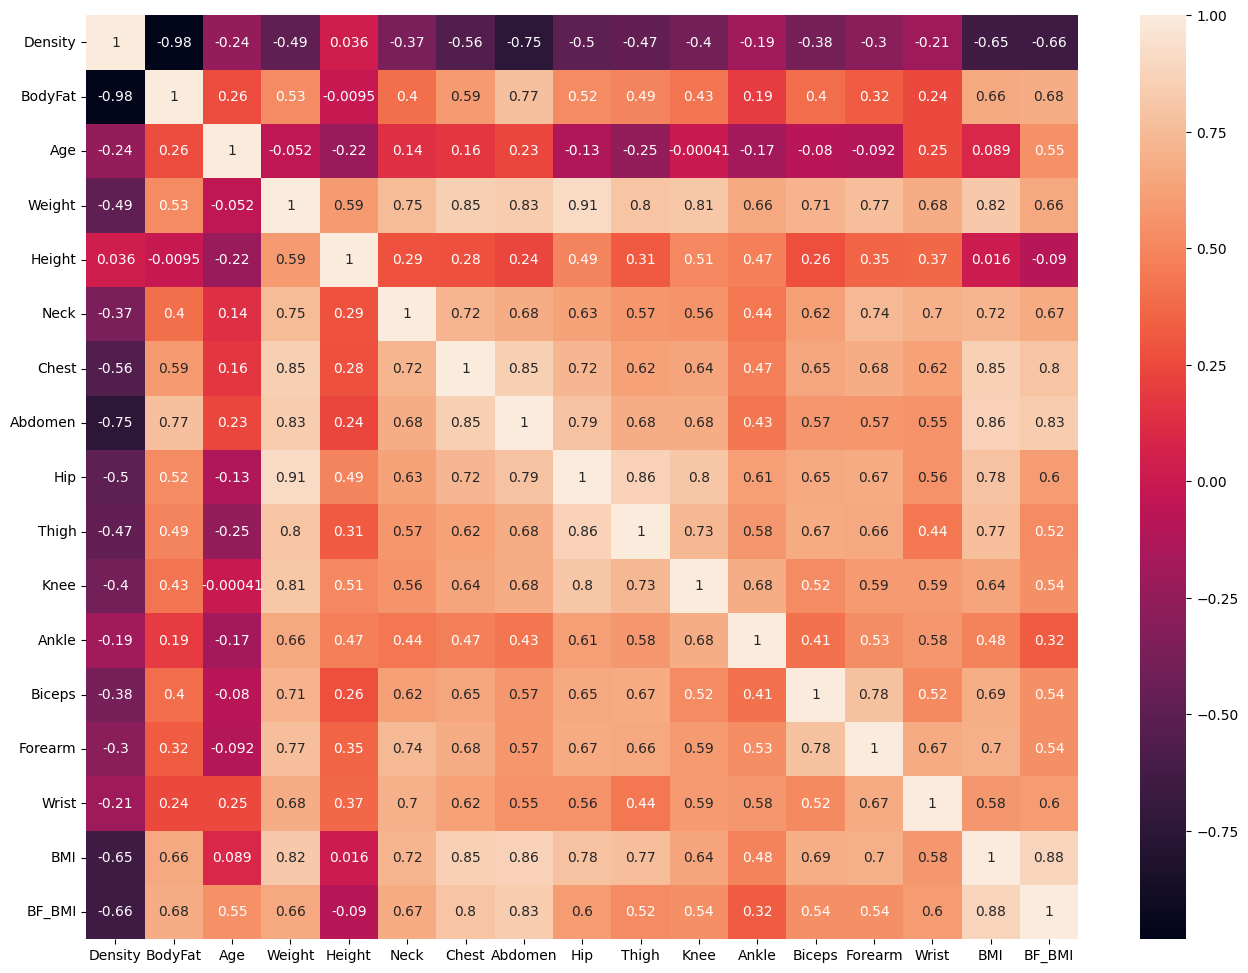

In [ ]:
# Visualisasi korelasi antar-variabel berupa heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pipaw.corr(), annot=True)
plt.show()

**Scatter Plot masing-masing variabel terhadap variabel 'BodyFat'**

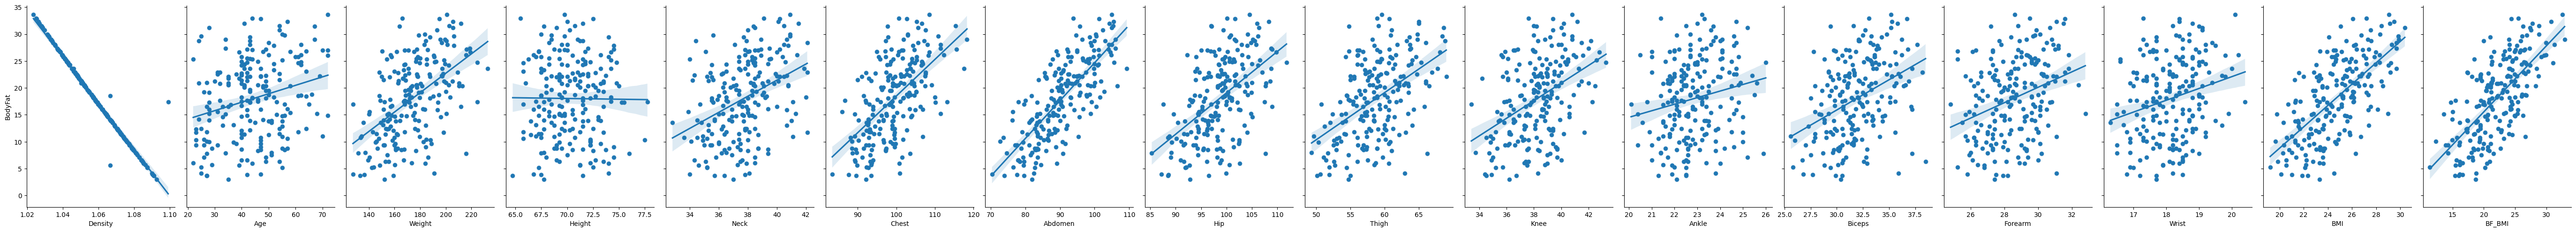

In [ ]:
plot = sns.pairplot(pipaw, x_vars=pipaw.drop(columns='BodyFat'), y_vars='BodyFat', height=5, aspect=0.7)
plot.map(sns.regplot)
plt.show()

### **Data Modelling**

In [ ]:
# Variabel independen
x = pipaw.drop(columns='BodyFat')

# Variabel dependen
y = pipaw['BodyFat']

In [ ]:
# Membagi data menjadi data latih dan uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Menentukan koefisien regresi masing-masing variabel
coef_dict = {
    'features' : x.columns,
    'coef_value' : lin_reg.coef_
}

coef = pd.DataFrame(coef_dict, columns = ['features', 'coef_value'])
coef

,features,coef_value
0,Density,-437.213064
1,Age,0.025621
2,Weight,0.037482
3,Height,-0.191771
4,Neck,0.024727
5,Chest,-0.000586
6,Abdomen,-0.004015
7,Hip,0.006082
8,Thigh,0.018473
9,Knee,-0.053228


In [ ]:
print("Intercept: ", lin_reg.intercept_)

Intercept:  491.1725173671506


**Didapatkan persamaan model regresi linear:**

BodyFat = 491.172 + (-433.351 * Density) + (0.027 * Age) + (0.045 * Weight) + (-0.244 * Height) + (0.028 * Neck) + (-0.016 * Chest) + (0.007 * Abdomen) + (0.016 * Hip) + (-0.011 * Thigh) + (-0.062 * Knee) + (0.058 * Ankle) + (0.010 * Biceps) + (-0.000 * Forearm) + (-0.155 * Wrist) + (-0.086 * BMI) + (-0.115 * BF_BMI)

### **Uji Hipotesis**

**F-TEST**

In [ ]:
x_train = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train).fit()

f_statistic = model.fvalue
p_value = model.f_pvalue
print("Nilai p-value dari F-test adalah:", p_value)
if p_value < 0.05:
    print("Hipotesis nol ditolak karena nilai p-value lebih kecil dari 0.05.")
    print("Artinya, terdapat hubungan yang signifikan antara setidaknya satu variabel independen dengan variabel dependen")
else:
    print("Hipotesis nol tidak ditolak karena nilai p-value lebih besar dari atau sama dengan 0.05.")
    print("Artinya, tidak terdapat cukup bukti untuk menyatakan bahwa terdapat hubungan yang signifikan antara setidaknya satu variabel independen dengan variabel dependen")

Nilai p-value dari F-test adalah: 3.87160787395061e-144
Hipotesis nol ditolak karena nilai p-value lebih kecil dari 0.05.
Artinya, terdapat hubungan yang signifikan antara setidaknya satu variabel independen dengan variabel dependen


### **Uji Evaluasi Model**

In [ ]:
# Menyimpan hasil prediksi berdasarkan data test
y_pred = lin_reg.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.5634287840405247
Mean Squared Error (MSE): 7.09654481462767
Root Mean Squared Error (RMSE): 2.6639340860140797
R-squared (R2): 0.8780200154070626


### **Perbandingan Prediksi dan Nilai Aktual Persentase Lemak Tubuh**

In [ ]:
# Mengambil data dari data test secara random
new_data = x_test.sample(n=1, random_state=42)
new_prediction = lin_reg.predict(new_data)

# Mengambil index dari sampel yang dipilih untuk mengambil nilai aktual
index = new_data.index[0]
actual_value = y_test.loc[index]

print('Data baru:')
print(new_data)

Data baru:
     Density  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  Knee  \
110   1.0538   43  170.75    68.5  37.2   96.3     90.6  99.3   61.9  38.0   

     Ankle  Biceps  Forearm  Wrist        BMI     BF_BMI  
110   22.3    33.3     28.2   18.1  25.582024  23.099013  


**Visualisasi**

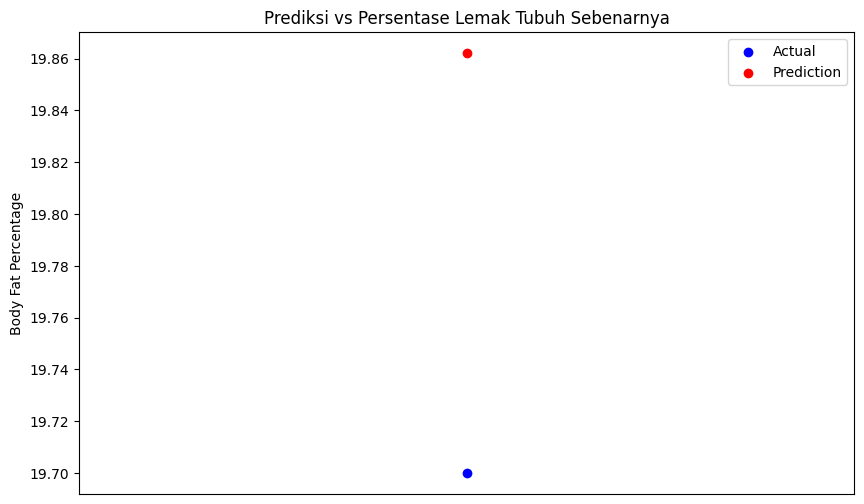

Prediksi baru persentase body fat: 19.862139827033673
Nilai aktual persentase body fat: 19.7


In [ ]:
# Visualisasi perbandingan hasil prediksi dengan data sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter([0], [actual_value], color='blue', label='Actual')
plt.scatter([0], [new_prediction[0]], color='red', label='Prediction')
plt.legend()
plt.title('Prediksi vs Persentase Lemak Tubuh Sebenarnya')
plt.ylabel('Body Fat Percentage')
plt.xticks([])
plt.show()

print('Prediksi baru persentase body fat:', new_prediction[0])
print('Nilai aktual persentase body fat:', actual_value)

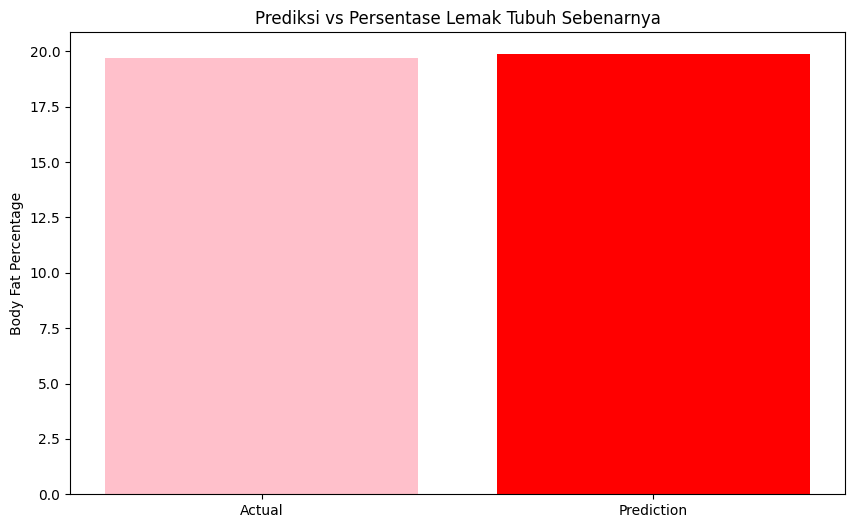

Prediksi baru persentase body fat: 19.862139827033673
Nilai aktual persentase body fat: 19.7


In [ ]:
plt.figure(figsize=(10, 6))

# Data untuk bar chart
categories = ['Actual', 'Prediction']
values = [actual_value, new_prediction[0]]

plt.bar(categories, values, color=['pink', 'red'])

plt.title('Prediksi vs Persentase Lemak Tubuh Sebenarnya')
plt.ylabel('Body Fat Percentage')
plt.show()

print('Prediksi baru persentase body fat:', new_prediction[0])
print('Nilai aktual persentase body fat:', actual_value)